# 1. Загрузка данных

In [ ]:
import pandas as pd
from IPython.display import display_html

In [ ]:
df_heart = pd.read_csv('heart.csv')
df_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df_score = pd.DataFrame(columns=['method',
                                 'precision_train', 'recall_train', 'f1-score_train',
                                 'precision_test', 'recall_test', 'f1-score_test',
                                 'fit_time'])

# 2. Анализ датасета

In [ ]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df_heart.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

Всего в датасете 5 категориальных признаков.

Для Sex и ExerciseAngina можно использовать LabelEncoder, т.к. у них всего по 2 варианта значений (женский или мужской пол и наличие или отсутсвие ангины из-за физических упражнений).

Для 'ChestPainType', 'RestingECG' и 'ST_Slope' можно использовать pd.get_dummies.

## 2.1. Работа с категориальными переменными

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

df_heart['Sex'] = le.fit_transform(df_heart['Sex'])
df_heart['ExerciseAngina'] = le.fit_transform(df_heart['ExerciseAngina'])

In [ ]:
df_heart = pd.get_dummies(df_heart, ['ChestPainType', 'RestingECG', 'ST_Slope'])

In [ ]:
df_heart.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,False,True,False,False,False,True,False,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,False,True,False,False,True,False,False,True,False
2,37,1,130,283,0,98,0,0.0,0,False,True,False,False,False,False,True,False,False,True
3,48,0,138,214,0,108,1,1.5,1,True,False,False,False,False,True,False,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,False,True,False,False,True,False,False,False,True


# 3. Разделение данных на train и test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_heart.drop(['HeartDisease'], axis=1)
X.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,False,True,False,False,False,True,False,False,False,True
1,49,0,160,180,0,156,0,1.0,False,False,True,False,False,True,False,False,True,False
2,37,1,130,283,0,98,0,0.0,False,True,False,False,False,False,True,False,False,True
3,48,0,138,214,0,108,1,1.5,True,False,False,False,False,True,False,False,True,False
4,54,1,150,195,0,122,0,0.0,False,False,True,False,False,True,False,False,False,True


In [ ]:
y = df_heart['HeartDisease']
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. LogisticRegression

In [ ]:

/
from sklearn.metrics import classification_report

In [ ]:
lr = LogisticRegression(max_iter=10000, random_state=42)

# 5. cross_validate()

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
def get_cv_result(model, X_train, X_test, y_train, y_test, best_est, df_score):
  cv = cross_validate(model,
                    X_train,
                    y_train,
                    cv=10,
                    return_estimator=True,
                    scoring=['accuracy', 'recall', 'precision', 'f1'])

  if best_est == None:
    best_est = cv['estimator'][0]
    model_name = model.__class__.__name__
  else:
    model_name = f'{model.__class__.__name__} ({best_est.__class__.__name__})'

  train_report = pd.DataFrame.from_dict(cv).describe().loc['mean']
  test_report = classification_report(y_test, best_est.predict(X_test), output_dict=True)['weighted avg']

  print(f'cross_validate for {model_name}:\n')
  display_html(pd.DataFrame.from_dict(cv).head(10))
  print(f"\nmean:\n\n {train_report}")
  print(f"\ntest:\n\n {classification_report(y_test, best_est.predict(X_test))}")

  df_score.loc[len(df_score)] = [model_name,
                                 train_report['test_precision'],
                                 train_report['test_recall'],
                                 train_report['test_f1'],
                                 test_report['precision'],
                                 test_report['recall'],
                                 test_report['f1-score'],
                                 train_report['fit_time']]

In [ ]:
get_cv_result(lr, X_train, X_test, y_train, y_test, None, df_score)

cross_validate for LogisticRegression:



,fit_time,score_time,estimator,test_accuracy,test_recall,test_precision,test_f1
0,0.393901,0.010634,"LogisticRegression(max_iter=10000, random_stat...",0.918919,0.925000,0.925000,0.925000
1,0.318580,0.011496,"LogisticRegression(max_iter=10000, random_stat...",0.878378,0.875000,0.897436,0.886076
2,0.331620,0.011393,"LogisticRegression(max_iter=10000, random_stat...",0.891892,0.875000,0.921053,0.897436
3,0.334481,0.011075,"LogisticRegression(max_iter=10000, random_stat...",0.864865,0.902439,0.860465,0.880952
4,0.251989,0.012774,"LogisticRegression(max_iter=10000, random_stat...",0.849315,0.875000,0.853659,0.864198
5,0.295754,0.011490,"LogisticRegression(max_iter=10000, random_stat...",0.890411,0.925000,0.880952,0.902439
6,0.070220,0.012206,"LogisticRegression(max_iter=10000, random_stat...",0.767123,0.825000,0.767442,0.795181
7,0.262256,0.012614,"LogisticRegression(max_iter=10000, random_stat...",0.876712,0.900000,0.878049,0.888889
8,0.768132,0.020101,"LogisticRegression(max_iter=10000, random_stat...",0.890411,0.950000,0.863636,0.904762
9,0.722146,0.025005,"LogisticRegression(max_iter=10000, random_stat...",0.835616,0.900000,0.818182,0.857143



mean:

 fit_time          0.374908
score_time        0.013879
test_accuracy     0.866364
test_recall       0.895244
test_precision    0.866587
test_f1           0.880208
Name: mean, dtype: float64

test:

               precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [ ]:
get_cv_result(lr, X_train, X_test, y_train, y_test, None, df_score)

cross_validate for LogisticRegression:



,fit_time,score_time,estimator,test_accuracy,test_recall,test_precision,test_f1
0,0.986614,0.023620,"LogisticRegression(max_iter=10000, random_stat...",0.918919,0.925000,0.925000,0.925000
1,1.152950,0.027071,"LogisticRegression(max_iter=10000, random_stat...",0.878378,0.875000,0.897436,0.886076
2,0.977989,0.011674,"LogisticRegression(max_iter=10000, random_stat...",0.891892,0.875000,0.921053,0.897436
3,0.546441,0.050075,"LogisticRegression(max_iter=10000, random_stat...",0.864865,0.902439,0.860465,0.880952
4,0.809467,0.026363,"LogisticRegression(max_iter=10000, random_stat...",0.849315,0.875000,0.853659,0.864198
5,0.702285,0.026605,"LogisticRegression(max_iter=10000, random_stat...",0.890411,0.925000,0.880952,0.902439
6,0.184718,0.013352,"LogisticRegression(max_iter=10000, random_stat...",0.767123,0.825000,0.767442,0.795181
7,0.388182,0.021523,"LogisticRegression(max_iter=10000, random_stat...",0.876712,0.900000,0.878049,0.888889
8,0.713837,0.018220,"LogisticRegression(max_iter=10000, random_stat...",0.890411,0.950000,0.863636,0.904762
9,0.807410,0.016960,"LogisticRegression(max_iter=10000, random_stat...",0.835616,0.900000,0.818182,0.857143



mean:

 fit_time          0.726989
score_time        0.023546
test_accuracy     0.866364
test_recall       0.895244
test_precision    0.866587
test_f1           0.880208
Name: mean, dtype: float64

test:

               precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



# 6. Оптимизация параметров модели

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## 6.1. GridSearchCV

In [ ]:
params = dict({'penalty': ['l1', 'l2'],
               'C': [0.01, 0.1, 0.5, 1, 10],
               'warm_start': [True, False],
               'solver': ['liblinear']})

In [ ]:
def get_cv_for_diff_params(searcher, X_train, X_test, y_train, y_test, df_score):
  print(f'{searcher.__class__.__name__}:\n')
  searcher.fit(X_train, y_train)
  print(f'best params: {searcher.best_params_}')
  print(f'best score: {searcher.best_score_}\n')

  get_cv_result(searcher, X_train, X_test, y_train, y_test, searcher.best_estimator_, df_score)

In [ ]:
get_cv_for_diff_params(GridSearchCV(lr, params), X_train, X_test, y_train, y_test, df_score)

GridSearchCV:

best params: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear', 'warm_start': True}
best score: 0.8651197465287485

cross_validate for GridSearchCV (LogisticRegression):



,fit_time,score_time,estimator,test_accuracy,test_recall,test_precision,test_f1
0,1.898545,0.015740,GridSearchCV(estimator=LogisticRegression(max_...,0.932432,0.925000,0.948718,0.936709
1,1.948375,0.013644,GridSearchCV(estimator=LogisticRegression(max_...,0.878378,0.875000,0.897436,0.886076
2,1.934068,0.017558,GridSearchCV(estimator=LogisticRegression(max_...,0.891892,0.875000,0.921053,0.897436
3,4.062587,0.037844,GridSearchCV(estimator=LogisticRegression(max_...,0.864865,0.902439,0.860465,0.880952
4,2.970499,0.014137,GridSearchCV(estimator=LogisticRegression(max_...,0.835616,0.875000,0.833333,0.853659
5,2.120787,0.007773,GridSearchCV(estimator=LogisticRegression(max_...,0.876712,0.900000,0.878049,0.888889
6,1.109792,0.008383,GridSearchCV(estimator=LogisticRegression(max_...,0.794521,0.850000,0.790698,0.819277
7,1.114684,0.007916,GridSearchCV(estimator=LogisticRegression(max_...,0.849315,0.850000,0.871795,0.860759
8,1.100075,0.008584,GridSearchCV(estimator=LogisticRegression(max_...,0.890411,0.950000,0.863636,0.904762
9,1.122945,0.008059,GridSearchCV(estimator=LogisticRegression(max_...,0.835616,0.900000,0.818182,0.857143



mean:

 fit_time          1.938236
score_time        0.013964
test_accuracy     0.864976
test_recall       0.890244
test_precision    0.868336
test_f1           0.878566
Name: mean, dtype: float64

test:

               precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



![Снимок экрана 2024-04-23 в 11.18.32.png](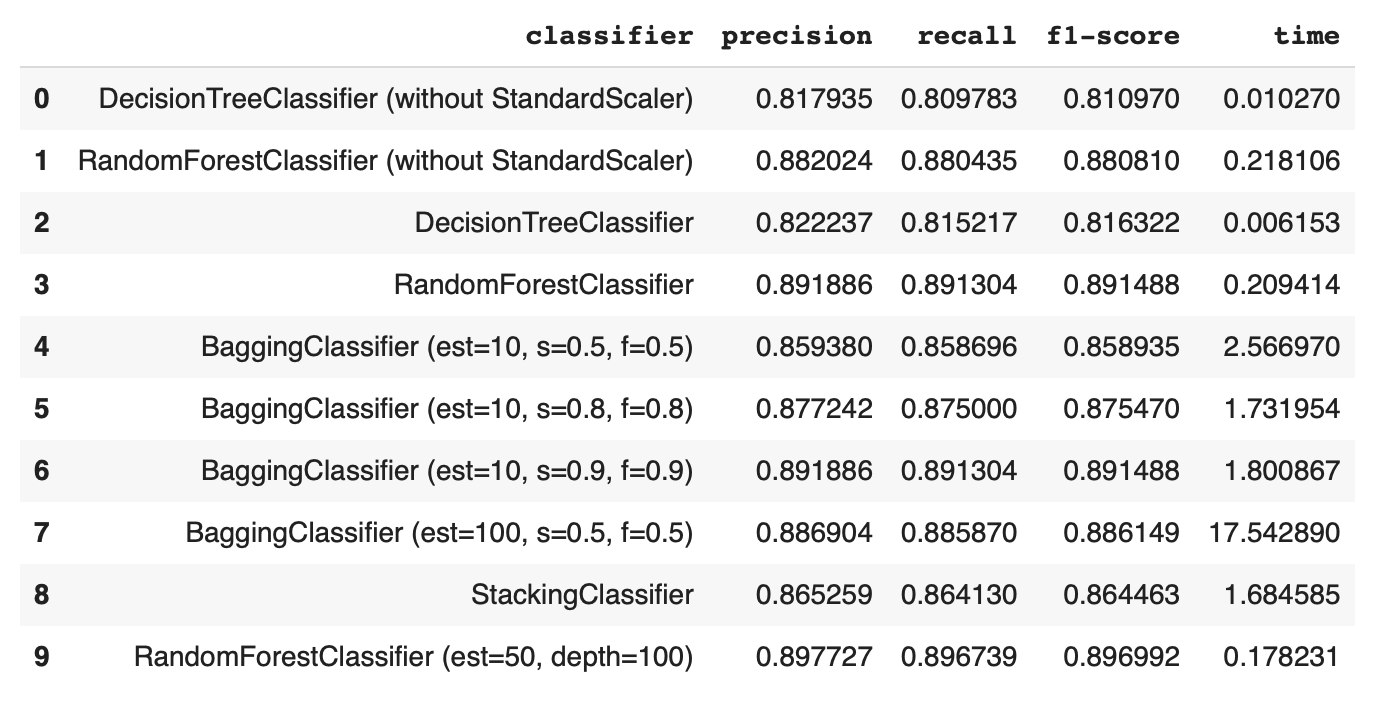![1.png](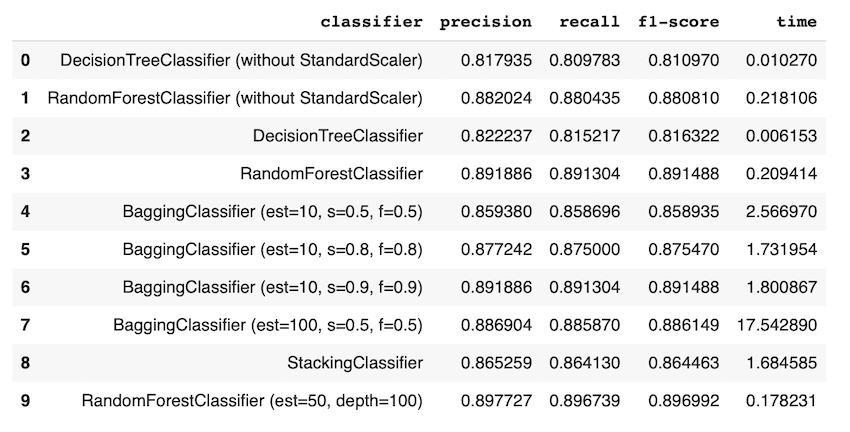![1.jpg](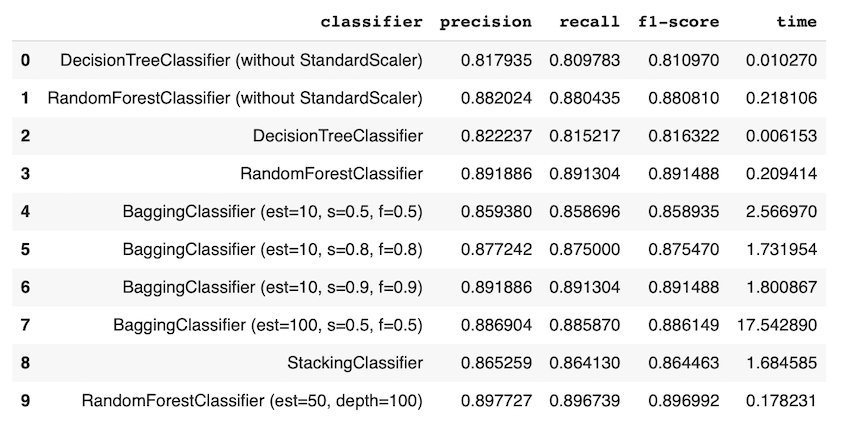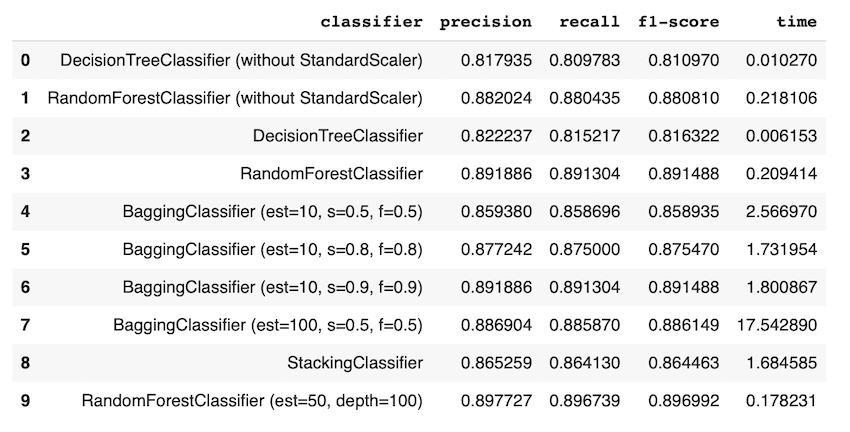)))## 6.2. RandomizedSearchCV

LogisticRegression

In [ ]:
get_cv_for_diff_params(RandomizedSearchCV(lr, params), X_train, X_test, y_train, y_test, df_score)

RandomizedSearchCV:

best params: {'warm_start': False, 'solver': 'liblinear', 'penalty': 'l1', 'C': 1}
best score: 0.8651197465287485

cross_validate for RandomizedSearchCV (LogisticRegression):



,fit_time,score_time,estimator,test_accuracy,test_recall,test_precision,test_f1
0,0.906824,0.011425,RandomizedSearchCV(estimator=LogisticRegressio...,0.932432,0.925000,0.948718,0.936709
1,0.880637,0.012297,RandomizedSearchCV(estimator=LogisticRegressio...,0.878378,0.875000,0.897436,0.886076
2,0.637161,0.014241,RandomizedSearchCV(estimator=LogisticRegressio...,0.891892,0.875000,0.921053,0.897436
3,0.529311,0.007050,RandomizedSearchCV(estimator=LogisticRegressio...,0.864865,0.902439,0.860465,0.880952
4,0.747815,0.008553,RandomizedSearchCV(estimator=LogisticRegressio...,0.821918,0.875000,0.813953,0.843373
5,0.576121,0.008762,RandomizedSearchCV(estimator=LogisticRegressio...,0.876712,0.900000,0.878049,0.888889
6,0.646972,0.009672,RandomizedSearchCV(estimator=LogisticRegressio...,0.794521,0.850000,0.790698,0.819277
7,0.629833,0.008487,RandomizedSearchCV(estimator=LogisticRegressio...,0.849315,0.850000,0.871795,0.860759
8,0.585006,0.007259,RandomizedSearchCV(estimator=LogisticRegressio...,0.876712,0.925000,0.860465,0.891566
9,0.524516,0.008044,RandomizedSearchCV(estimator=LogisticRegressio...,0.835616,0.900000,0.818182,0.857143



mean:

 fit_time          0.666420
score_time        0.009579
test_accuracy     0.862236
test_recall       0.887744
test_precision    0.866081
test_f1           0.876218
Name: mean, dtype: float64

test:

               precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



## 6.3. RandomizedSearchCV

KNeighborsClassifier, SVC, PCA, RandomForestClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [ ]:
knn = KNeighborsClassifier()
params = dict({'n_neighbors': [2, 5, 10, 20],
               'weights': ['uniform' , 'distance'],
               'algorithm': ['auto' , 'ball_tree' , 'kd_tree' ,'brute']})

get_cv_for_diff_params(RandomizedSearchCV(knn, params), X_train, X_test, y_train, y_test, df_score)

RandomizedSearchCV:

best params: {'weights': 'distance', 'n_neighbors': 10, 'algorithm': 'ball_tree'}
best score: 0.7125151430435188

cross_validate for RandomizedSearchCV (KNeighborsClassifier):



,fit_time,score_time,estimator,test_accuracy,test_recall,test_precision,test_f1
0,0.668049,0.011522,RandomizedSearchCV(estimator=KNeighborsClassif...,0.810811,0.875000,0.795455,0.833333
1,0.580299,0.012601,RandomizedSearchCV(estimator=KNeighborsClassif...,0.743243,0.800000,0.744186,0.771084
2,0.739026,0.013344,RandomizedSearchCV(estimator=KNeighborsClassif...,0.729730,0.725000,0.763158,0.743590
3,0.824010,0.016713,RandomizedSearchCV(estimator=KNeighborsClassif...,0.716216,0.707317,0.763158,0.734177
4,0.640230,0.011003,RandomizedSearchCV(estimator=KNeighborsClassif...,0.753425,0.825000,0.750000,0.785714
5,0.634968,0.016933,RandomizedSearchCV(estimator=KNeighborsClassif...,0.684932,0.625000,0.757576,0.684932
6,0.749159,0.022246,RandomizedSearchCV(estimator=KNeighborsClassif...,0.684932,0.675000,0.729730,0.701299
7,2.112188,0.010004,RandomizedSearchCV(estimator=KNeighborsClassif...,0.657534,0.625000,0.714286,0.666667
8,0.667135,0.011023,RandomizedSearchCV(estimator=KNeighborsClassif...,0.739726,0.825000,0.733333,0.776471
9,0.688843,0.014769,RandomizedSearchCV(estimator=KNeighborsClassif...,0.684932,0.750000,0.697674,0.722892



mean:

 fit_time          0.830391
score_time        0.014016
test_accuracy     0.720548
test_recall       0.743232
test_precision    0.744856
test_f1           0.742016
Name: mean, dtype: float64

test:

               precision    recall  f1-score   support

           0       0.62      0.69      0.65        77
           1       0.76      0.69      0.72       107

    accuracy                           0.69       184
   macro avg       0.69      0.69      0.69       184
weighted avg       0.70      0.69      0.69       184



In [ ]:
svc = SVC(random_state=42)
params = dict({'C': [0.01, 0.1, 0.5, 1],
               'kernel': ['linear' , 'poly', 'rbf', 'sigmoid']})

get_cv_for_diff_params(RandomizedSearchCV(svc, params), X_train, X_test, y_train, y_test, df_score)

RandomizedSearchCV:

best params: {'kernel': 'linear', 'C': 0.5}
best score: 0.866489609542447

cross_validate for RandomizedSearchCV (SVC):



,fit_time,score_time,estimator,test_accuracy,test_recall,test_precision,test_f1
0,10.371686,0.013397,RandomizedSearchCV(estimator=SVC(random_state=...,0.932432,0.950000,0.926829,0.938272
1,3.985030,0.008764,RandomizedSearchCV(estimator=SVC(random_state=...,0.878378,0.850000,0.918919,0.883117
2,21.602633,0.008527,RandomizedSearchCV(estimator=SVC(random_state=...,0.891892,0.875000,0.921053,0.897436
3,24.751508,0.008239,RandomizedSearchCV(estimator=SVC(random_state=...,0.851351,0.902439,0.840909,0.870588
4,6.421786,0.008591,RandomizedSearchCV(estimator=SVC(random_state=...,0.821918,0.875000,0.813953,0.843373
5,12.934041,0.014695,RandomizedSearchCV(estimator=SVC(random_state=...,0.876712,0.900000,0.878049,0.888889
6,9.510520,0.007973,RandomizedSearchCV(estimator=SVC(random_state=...,0.753425,0.825000,0.750000,0.785714
7,9.706822,0.007741,RandomizedSearchCV(estimator=SVC(random_state=...,0.863014,0.875000,0.875000,0.875000
8,15.299814,0.009990,RandomizedSearchCV(estimator=SVC(random_state=...,0.863014,0.950000,0.826087,0.883721
9,9.683778,0.008438,RandomizedSearchCV(estimator=SVC(random_state=...,0.849315,0.925000,0.822222,0.870588



mean:

 fit_time          12.426762
score_time         0.009635
test_accuracy      0.858145
test_recall        0.892744
test_precision     0.857302
test_f1            0.873670
Name: mean, dtype: float64

test:

               precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [ ]:
rfc = RandomForestClassifier(random_state=42)
params = dict({'n_estimators': [100, 100, 200, 300, 400, 500],
               'criterion': ['gini', 'entropy', 'log_loss'],
               'max_depth': [None, 1, 5, 10, 20],
               'max_features': ['sqrt', 'log2'],
               'bootstrap': [True, False]})

get_cv_for_diff_params(RandomizedSearchCV(rfc, params), X_train, X_test, y_train, y_test, df_score)

RandomizedSearchCV:

best params: {'n_estimators': 200, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'log_loss', 'bootstrap': False}
best score: 0.8705619233994968

cross_validate for RandomizedSearchCV (RandomForestClassifier):



,fit_time,score_time,estimator,test_accuracy,test_recall,test_precision,test_f1
0,31.936145,0.039908,RandomizedSearchCV(estimator=RandomForestClass...,0.891892,0.925000,0.880952,0.902439
1,26.319422,0.013306,RandomizedSearchCV(estimator=RandomForestClass...,0.878378,0.875000,0.897436,0.886076
2,23.010623,0.013255,RandomizedSearchCV(estimator=RandomForestClass...,0.905405,0.900000,0.923077,0.911392
3,19.582101,0.017898,RandomizedSearchCV(estimator=RandomForestClass...,0.864865,0.926829,0.844444,0.883721
4,25.454283,0.037289,RandomizedSearchCV(estimator=RandomForestClass...,0.835616,0.900000,0.818182,0.857143
5,27.771933,0.032861,RandomizedSearchCV(estimator=RandomForestClass...,0.876712,0.925000,0.860465,0.891566
6,30.535668,0.030402,RandomizedSearchCV(estimator=RandomForestClass...,0.849315,0.925000,0.822222,0.870588
7,27.754277,0.020145,RandomizedSearchCV(estimator=RandomForestClass...,0.863014,0.875000,0.875000,0.875000
8,31.623840,0.037629,RandomizedSearchCV(estimator=RandomForestClass...,0.876712,0.950000,0.844444,0.894118
9,29.166849,0.031184,RandomizedSearchCV(estimator=RandomForestClass...,0.849315,0.925000,0.822222,0.870588



mean:

 fit_time          27.315514
score_time         0.027388
test_accuracy      0.869123
test_recall        0.912683
test_precision     0.858845
test_f1            0.884263
Name: mean, dtype: float64

test:

               precision    recall  f1-score   support

           0       0.82      0.87      0.84        77
           1       0.90      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



# 7. Выводы

In [ ]:
df_score.head(10)

,method,precision_train,recall_train,f1-score_train,precision_test,recall_test,f1-score_test,fit_time
0,LogisticRegression,0.866587,0.895244,0.880208,0.863439,0.858696,0.859441,0.374908
1,LogisticRegression,0.866587,0.895244,0.880208,0.863439,0.858696,0.859441,0.726989
2,GridSearchCV (LogisticRegression),0.868336,0.890244,0.878566,0.867953,0.864130,0.864787,1.938236
3,RandomizedSearchCV (LogisticRegression),0.866081,0.887744,0.876218,0.867953,0.864130,0.864787,0.666420
4,RandomizedSearchCV (KNeighborsClassifier),0.744856,0.743232,0.742016,0.697008,0.690217,0.691970,0.830391
5,RandomizedSearchCV (SVC),0.857302,0.892744,0.873670,0.861753,0.858696,0.859307,12.426762
6,RandomizedSearchCV (RandomForestClassifier),0.858845,0.912683,0.884263,0.866437,0.864130,0.864642,27.315514



RandomizedSearchCV с KNN справился не очень хорошо, лучший результат для тестовых данных **0.69**.

Остальные классификаторы показали в целом одинаковые результаты, примерно **0.86**.

RandomizedSearchCV с RandomForestClassifier обучался медленнее всех - 27 секунд, у SVC время обучение тоже достаточно большое - 12 секунд, GridSearchCV для LogisticRegression - почти 2 секунды. У остальных время обучения менее секунды.

В домашнем задании по теме «Ансамблирование» марксимальный результат (**0.9**) показала RandomForestClassifier для 50 деревьев с максимальной глубиной 100.